<a href="https://colab.research.google.com/github/Antoniopiki/Harry-Potter-Sentiment-Analysis/blob/main/Harry_Potter_Sentiment_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Instalación y carga de Librerías

In [ ]:
install.packages("rmarkdown")
library(rmarkdown)
install.packages("rvest")
library(rvest) # Para hacer web scrapping
install.packages("dplyr")
library(dplyr) # Cuestiones generales (filtrado, agrupación, etc.)
install.packages("stringr")
library(stringr) # Manipulación de textos
install.packages("tidyr")
library(tidyr) # Manipulación de textos (unnest)
install.packages("tm")
library(tm) # Manipulación de textos
install.packages("ggplot2")
library(ggplot2) # Gráficos
install.packages("paletteer")
library(paletteer) # Paleta de Colores
install.packages("tidytext")
library(tidytext)
install.packages("stopwords")
library(stopwords)
install.packages("wordcloud")
library(wordcloud)
install.packages("igraph")
library(igraph)
install.packages("ggraph")
library(ggraph)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Loading required package: NLP

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)


Attaching package: ‘ggplot2’


The following object is masked from ‘package:NLP’:

    annotate


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also 

En primer lugar, identificamos la URL donde están almacenados los dia´logos de los libros de Harry Potter.

# Web Scraping

In [ ]:
url1=NA
for(i in 1:8){
  url1[i] = paste0("https://raw.githubusercontent.com/Kornflex28/hp-dataset/main/datasets/hp",i,".csv")
  i = i + 1 
}

url1

[1] "https://raw.githubusercontent.com/Kornflex28/hp-dataset/main/datasets/hp1.csv"
[2] "https://raw.githubusercontent.com/Kornflex28/hp-dataset/main/datasets/hp2.csv"
[3] "https://raw.githubusercontent.com/Kornflex28/hp-dataset/main/datasets/hp3.csv"
[4] "https://raw.githubusercontent.com/Kornflex28/hp-dataset/main/datasets/hp4.csv"
[5] "https://raw.githubusercontent.com/Kornflex28/hp-dataset/main/datasets/hp5.csv"
[6] "https://raw.githubusercontent.com/Kornflex28/hp-dataset/main/datasets/hp6.csv"
[7] "https://raw.githubusercontent.com/Kornflex28/hp-dataset/main/datasets/hp7.csv"
[8] "https://raw.githubusercontent.com/Kornflex28/hp-dataset/main/datasets/hp8.csv"

Creamos una lista para almacenar los data frames de cada archivo CSV, iteramos sobre cada URL, importamos el archivo CSV y almacenamos el data frame en la lista


In [ ]:
lista_hp <- list()  

for (url in url1) {
  df <- read.csv(url)
  lista_hp[[url]] <- df
}

Combinamos los data frames en un solo data frame utilizando la función rbind()


In [ ]:
hp_total <- do.call(rbind, lista_hp)

Eliminamos la URL como row.name


In [ ]:
row.names(hp_total) = 1:nrow(hp_total)
head(hp_total)

,movie,chapter,character,dialog
,<chr>,<chr>,<chr>,<chr>
1,Harry Potter and the Philosopher's Stone,Doorstep Delivery,Albus Dumbledore,I should have known that you would be here...Professor McGonagall.
2,Harry Potter and the Philosopher's Stone,Doorstep Delivery,Minerva McGonagall,"Good evening, Professor Dumbledore. Are the rumours true, Albus?"
3,Harry Potter and the Philosopher's Stone,Doorstep Delivery,Albus Dumbledore,"I'm afraid so, Professor. The good, and the bad."
4,Harry Potter and the Philosopher's Stone,Doorstep Delivery,Minerva McGonagall,And the boy?
5,Harry Potter and the Philosopher's Stone,Doorstep Delivery,Albus Dumbledore,Hagrid is bringing him.
6,Harry Potter and the Philosopher's Stone,Doorstep Delivery,Minerva McGonagall,Do you think it wise to trust Hagrid with something as important as this?


# Análisis y Limpieza de Datos

A continuación, comenzamos a analizar el texto de cada diálogo

Vemos que tenemos algunas frases que empiezan y/o terminan con caracteres especiales:

In [ ]:
hp_total[grep("^[^[:alnum:]]", hp_total$dialog),]

,movie,chapter,character,dialog
,<chr>,<chr>,<chr>,<chr>
361,Harry Potter and the Philosopher's Stone,New Seeker,Quirinus Quirrell,... an essential in-gredient.
603,Harry Potter and the Philosopher's Stone,Norbert,Ron Weasley,...I forgot.
616,Harry Potter and the Philosopher's Stone,Norbert,Ron Weasley,"'Dumbledore is particularly famous for his defeat of the Dark"" Wizard Grindelwald in 1945–'"
618,Harry Potter and the Philosopher's Stone,Norbert,Ron Weasley,"'-for his discovery of the 12 uses of Dragon Blood, and his work on alchemy with his partner Nicolas Flamel!'"
632,Harry Potter and the Philosopher's Stone,Norbert,Hermione Granger,"""The only stone currently in existence belongs to Mr. Nicholas Flamel, the noted alchemist, who last year celebrated his 665th birthday!"" That's what Fluffy's guarding on the 3rd floor. That's what's under the trapdoor...the Philosopher's Stone!"
898,Harry Potter and the Chamber of Secrets,In a cage,Petunia Dursley,"…in the lounge, waiting to welcome them graciously into our home."
953,Harry Potter and the Chamber of Secrets,Dobby's warning,Vernon Dursley,"…it spread as far as the eye could see, all over the floor of this vast building, and it was this deep. And one plumber said “Look at all that water.” A-and the second plumber said, “Yes, and that's just the top of it!”"
1028,Harry Potter and the Chamber of Secrets,To Diagon Alley,Harry Potter,'Diaganilly.'
1030,Harry Potter and the Chamber of Secrets,To Diagon Alley,Arthur Weasley,'Diaganilly.'


Vemos que tenemos casos de '; ""; -; etc...

Tras analizarlo, nos interesaría eliminar todos los caracteres especiales excepto los que comienzan con "...":

Por lo tanto, en vez de eliminar todos los caracteres de una vez, iremos casuística a casuística.

a) Empiezan y terminan por Comilla " ' "

In [ ]:
# a) Empiezan y terminan por Comilla "'"

selected_rows1 <- grep("^'|'$", hp_total$dialog)

# Mostramos los registros seleccionados
hp_total[selected_rows1,]

# Eliminamos los caracteres "'" de los registros seleccionados
hp_total$dialog[selected_rows1] <- gsub("^'|'$", "", hp_total$dialog[selected_rows1])


,movie,chapter,character,dialog
,<chr>,<chr>,<chr>,<chr>
616,Harry Potter and the Philosopher's Stone,Norbert,Ron Weasley,"'Dumbledore is particularly famous for his defeat of the Dark"" Wizard Grindelwald in 1945–'"
618,Harry Potter and the Philosopher's Stone,Norbert,Ron Weasley,"'-for his discovery of the 12 uses of Dragon Blood, and his work on alchemy with his partner Nicolas Flamel!'"
1028,Harry Potter and the Chamber of Secrets,To Diagon Alley,Harry Potter,'Diaganilly.'
1030,Harry Potter and the Chamber of Secrets,To Diagon Alley,Arthur Weasley,'Diaganilly.'
1245,Harry Potter and the Chamber of Secrets,Kill!,Hermione Granger,'The Chamber of Secrets has been opened… enemies the heir… beware.' It's written in blood.
1249,Harry Potter and the Chamber of Secrets,Kill!,Draco Malfoy,"'Enemies of the heir beware!' You'll be next, Mudbloods!"
1294,Harry Potter and the Chamber of Secrets,About the Chamber,Ron Weasley,"Of course. You heard him! 'You'll be next Mudbloods,'"
1299,Harry Potter and the Chamber of Secrets,Rogue Bludger,Hermione Granger,"Here it is. 'The Polyjuice Potion.' 'Properly brewed, the Polyjuice Potion allows the drinker to transform himself temporarily into the physical form of another.'"
1531,Harry Potter and the Chamber of Secrets,The diary,Harry Potter,'Tom Marvolo Riddle.'


b) Empiezan por doble guión "--"

In [ ]:
# b) Empiezan por doble guión "--"

selected_rows2 <- grep("^--", hp_total$dialog)

# Mostramos los registros seleccionados
hp_total[selected_rows2,]

# Eliminamos los caracteres "'" de los registros seleccionados
hp_total$dialog[selected_rows2] <- gsub("^--", "", hp_total$dialog[selected_rows2])



,movie,chapter,character,dialog
,<chr>,<chr>,<chr>,<chr>
5744,Harry Potter and the Deathly Hallows Part 1,Dark Lord Ascending,Severus Snape,-- from the source we discussed.


c) Empiezan por "-..-"

In [ ]:
# c) Empiezan por "-..-"

selected_rows3 <- grep("^-..-", hp_total$dialog)

# Mostramos los registros seleccionados
hp_total[selected_rows3,]

# Eliminamos los caracteres "'" de los registros seleccionados
hp_total$dialog[selected_rows3] <- gsub("^-..-", "", hp_total$dialog[selected_rows3])

,movie,chapter,character,dialog
,<chr>,<chr>,<chr>,<chr>
4107,Harry Potter and the Order of the Phoenix,Unquiet Escape,Albus Dumbledore,-..-You cannot send them from this


d) Empiezan por "-"

In [ ]:
selected_rows4 <- grep("^-", hp_total$dialog)

# Mostramos los registros seleccionados
hp_total[selected_rows4,]

# Eliminamos los caracteres "'" de los registros seleccionados
hp_total$dialog[selected_rows4] <- gsub("^-", "", hp_total$dialog[selected_rows4])

,movie,chapter,character,dialog
,<chr>,<chr>,<chr>,<chr>
618,Harry Potter and the Philosopher's Stone,Norbert,Ron Weasley,"-for his discovery of the 12 uses of Dragon Blood, and his work on alchemy with his partner Nicolas Flamel!"


Empiezan y terminan por doble comilla " "" "

In [ ]:
selected_rows5 <- grep('^".*"$', hp_total$dialog)

# Mostramos los registros seleccionados
hp_total[selected_rows5,]

# Eliminamos los caracteres "'" de los registros seleccionados
hp_total$dialog[selected_rows5] <- gsub('^"|"$', "", hp_total$dialog[selected_rows5])

,movie,chapter,character,dialog
,<chr>,<chr>,<chr>,<chr>
3944,Harry Potter and the Order of the Phoenix,In the Hog's Head,Harry Potter,"""By order of the Hogwarts High Inquisitor: All student organizations, societies, teams, groups, and clubs are henceforth disbanded. Permission to reform must be approved by High Inquisitor Umbridge. No student organization can exist without the knowledge and approval of the High Inquisitor. Any student found to be a part of an illegal organization will be expelled immediately."""
4162,Harry Potter and the Order of the Phoenix,Unquiet Escape,Dolores Umbridge,"""By Order of the Ministry of Magic: Dolores Jane Umbridge will replace Albus Dumbledore as Head of Hogwarts School of Witchcraft and Wizardry."""


f) Empiezan por doble comilla " "" "

In [ ]:
selected_rows6 <- grep('^"', hp_total$dialog)

# Mostramos los registros seleccionados
hp_total[selected_rows6,]

# Eliminamos los caracteres "'" de los registros seleccionados
hp_total$dialog[selected_rows6] <- gsub('^"', "", hp_total$dialog[selected_rows6])

,movie,chapter,character,dialog
,<chr>,<chr>,<chr>,<chr>
632,Harry Potter and the Philosopher's Stone,Norbert,Hermione Granger,"""The only stone currently in existence belongs to Mr. Nicholas Flamel, the noted alchemist, who last year celebrated his 665th birthday!"" That's what Fluffy's guarding on the 3rd floor. That's what's under the trapdoor...the Philosopher's Stone!"
3519,Harry Potter and the Order of the Phoenix,Dudley Demented,Harry Potter,"""Expecto Patronum!"
3522,Harry Potter and the Order of the Phoenix,Dudley Demented,Harry Potter,"""Expecto Patronum!"
3574,Harry Potter and the Order of the Phoenix,The Advance Guard,Remus Lupin,"""Expecto Patronum!"
3895,Harry Potter and the Order of the Phoenix,In the Hog's Head,Ron Weasley,"""The Hog's Head,"" Hermione?"
4597,Harry Potter and the Order of the Phoenix,The Lost Prophecy,Sybill Trelawney,"""The One with the power to vanquish the Dark Lord approaches....Born to"


g) Empiezan por un punto " . "

In [ ]:
selected_rows7 <- grep('^\\.', hp_total$dialog)

# Mostramos los registros seleccionados
hp_total[selected_rows7,]

# Al hacer esto, vemos que nos muestra los registros que empiezan por puntos suspensivos, los cuales no queremos eliminar
# Modificamos la expresión anterior:

selected_rows7 <- grep("^\\.([^\\.].*)$", hp_total$dialog)

# Mostramos los registros seleccionados
hp_total[selected_rows7,]

# Eliminamos los caracteres "'" de los registros seleccionados
hp_total$dialog[selected_rows7] <- gsub("^\\.([^\\.].*)$", "\\1", hp_total$dialog[selected_rows7])


,movie,chapter,character,dialog
,<chr>,<chr>,<chr>,<chr>
361,Harry Potter and the Philosopher's Stone,New Seeker,Quirinus Quirrell,... an essential in-gredient.
603,Harry Potter and the Philosopher's Stone,Norbert,Ron Weasley,...I forgot.
2055,Harry Potter and the Prisoner of Azkaban,Welcome and Warning,Ron Weasley,". Green. That's a monkey. What is that? You call that a monkey? Do not give him one again. Hey, Neville, try an elephant."
2977,Harry Potter and the Gobelt of Fire,Rita Skeeter,Rita Skeeter,...about to compete against three students. Not only vastly more emotionally mature than yourself but have mastered spells that you wouldn't attempt in your dizziest daydreams. Concerned?
3206,Harry Potter and the Gobelt of Fire,The Yule Ball,Parvati Patil,... dashing.
3792,Harry Potter and the Order of the Phoenix,"Preserve, Perfect and Prune",Albus Dumbledore,... which are posted in an extensive list on the door to Mr. Filch's door.
3981,Harry Potter and the Order of the Phoenix,Dumbledore's Army,Lee Jordan,...and Slytherin is up forty to ten. Alica with the quaffle!
4110,Harry Potter and the Order of the Phoenix,Unquiet Escape,Albus Dumbledore,...the Ministry can only appoint new teachers if I cannot find one. I think you will find him suitable enough.
4945,Harry Potter and the Half-Blood Prince,The Secret Riddle,Albus Dumbledore,"... I was merely curious. In any event, I'm sure you're wondering why I've summoned you here tonight. The answer lies here."


,movie,chapter,character,dialog
,<chr>,<chr>,<chr>,<chr>
2055,Harry Potter and the Prisoner of Azkaban,Welcome and Warning,Ron Weasley,". Green. That's a monkey. What is that? You call that a monkey? Do not give him one again. Hey, Neville, try an elephant."


h) Empiezan por un espacio "  "

In [ ]:
selected_rows8 <- grep("^\\s+", hp_total$dialog)

# Mostramos los registros seleccionados
hp_total[selected_rows8,]

# Eliminamos los caracteres de los registros seleccionados
hp_total$dialog[selected_rows8] <- gsub("^\\s+", "", hp_total$dialog[selected_rows8])

,movie,chapter,character,dialog
,<chr>,<chr>,<chr>,<chr>
2055,Harry Potter and the Prisoner of Azkaban,Welcome and Warning,Ron Weasley,"Green. That's a monkey. What is that? You call that a monkey? Do not give him one again. Hey, Neville, try an elephant."
5744,Harry Potter and the Deathly Hallows Part 1,Dark Lord Ascending,Severus Snape,from the source we discussed.


i) Empiezan por dos puntos " : "

In [ ]:
selected_rows9 <- grep('^:', hp_total$dialog)

# Mostramos los registros seleccionados
hp_total[selected_rows9,]

# Eliminamos los caracteres "'" de los registros seleccionados
hp_total$dialog[selected_rows9] <- gsub('^:', "", hp_total$dialog[selected_rows9])

,movie,chapter,character,dialog
,<chr>,<chr>,<chr>,<chr>
1939,Harry Potter and the Prisoner of Azkaban,The Leaky Cauldron,Tom,: Room 11.
1941,Harry Potter and the Prisoner of Azkaban,The Leaky Cauldron,Cornelius Fudge,": Right smart bird you got there, Mr. Potter. He arrived here just five minutes before yourself."
1943,Harry Potter and the Prisoner of Azkaban,The Leaky Cauldron,Tom,: Pea soup?
1970,Harry Potter and the Prisoner of Azkaban,In Grave Danger,Fred Weasley,": No, not a soul. Not unless you count Tom. The day maid. The night maid. The Cook. The bloke who fixed the toilet. And that wizard from Belgium."
1971,Harry Potter and the Prisoner of Azkaban,In Grave Danger,George Weasley,": No, not a soul. Not unless you count Tom. The day maid. The night maid. The Cook. The bloke who fixed the toilet. And that wizard from Belgium."


j) Por último, vemos que nos queda 1 registro en blanco. Lo eliminamos:

In [ ]:
# Identificar los registros vacíos
selected_rows10 <- which(is.na(hp_total$dialog) | hp_total$dialog == "")

# Ver cuáles son esos registros
print(hp_total[selected_rows10,])

# Eliminar los registros vacíos
hp_total <- hp_total[-selected_rows10,]

                                       movie       chapter character dialog
1422 Harry Potter and the Chamber of Secrets A Parselmouth  Students       


Ahora que hemos limpiado los caracteres especiales, vemos duplicados.

In [ ]:
duplicated(hp_total$dialog)

which(duplicated(hp_total$dialog))


Duplicados <- duplicated(hp_total[1:7444,c(1:4)])
hp_total[Duplicados,]
df_duplicados = as.data.frame(Duplicados)
hp_total_nodup <- cbind(df_duplicados,hp_total)

[1] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
  [13] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
  [25] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
  [37] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
  [49] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
  [61] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
  [73] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
  [85] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
  [97] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [109] FALSE FALSE FALSE FALSE FALSE FALSE FALSE  TRUE FALSE FALSE FALSE FALSE
 [121] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [133] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [145] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [157] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [169] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [181] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [193] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [205] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [217] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [229] FALSE FALSE FALSE FALSE FALSE  TRUE FALSE FALSE FALSE FALSE FALSE FALSE
 [241] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE  TRUE
 [253] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [265]  TRUE FALSE FALSE  TRUE FALSE FALSE FALSE FALSE FALSE  TRUE FALSE FALSE
 [277] FALSE FALSE FALSE FALSE FALSE FALSE FALSE  TRUE FALSE FALSE FALSE FALSE
 [289] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [301] FALSE FALSE FALSE FALSE FALSE FALSE  TRUE FALSE FALSE FALSE FALSE FALSE
 [313] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE  TRUE
 [325]  TRUE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE  TRUE
 [337] FALSE FALSE FALSE FALSE FALSE  TRUE FALSE FALSE FALSE FALSE FALSE FALSE
 [349] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [361] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [373] FALSE FALSE FALSE FALSE FALSE FALSE FALSE  TRUE FALSE FALSE FALSE FALSE
 [385] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [397] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [409] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [421] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [433] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [445] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [457] FALSE FALSE FALSE FALSE FALSE  TRUE FALSE FALSE FALSE FALSE FALSE FALSE
 [469] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [481] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE  TRUE FALSE FALSE
 [493] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [505]  TRUE FALSE FALSE  TRUE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [517] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE  TRUE FALSE FALSE
 [529] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [541] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [553] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE  TRUE FALSE FALSE
 [565] FALSE FALSE FALSE  TRUE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [577] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [589] FALSE FALSE FALSE  TRUE FALSE  TRUE FALSE FALSE FALSE FALSE FALSE FALSE
 [601] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALS

[1]  116  234  252  265  268  274  284  307  324  325  336  342  380  462  490
 [16]  505  508  526  562  568  592  594  625  626  636  637  643  658  680  713
 [31]  742  745  761  767  770  775  777  782  785  805  815  864  873  874  940
 [46]  965  979  996  997 1008 1009 1010 1030 1038 1081 1084 1098 1105 1110 1116
 [61] 1119 1120 1123 1126 1128 1129 1225 1233 1236 1248 1319 1323 1375 1378 1398
 [76] 1426 1436 1445 1463 1482 1484 1488 1514 1518 1534 1548 1549 1557 1559 1572
 [91] 1573 1574 1591 1628 1649 1650 1660 1665 1666 1685 1730 1731 1732 1734 1749
[106] 1754 1798 1800 1801 1826 1841 1854 1864 1870 1871 1875 1880 1883 1944 1953
[121] 1960 1961 1967 1970 1971 1976 1981 1982 1983 1996 1998 2014 2019 2030 2051
[136] 2053 2088 2092 2093 2115 2130 2134 2135 2141 2143 2145 2218 2238 2243 2260
[151] 2269 2275 2287 2291 2307 2308 2310 2375 2379 2392 2404 2422 2455 2456 2464
[166] 2468 2478 2481 2505 2526 2551 2559 2574 2578 2580 2581 2583 2592 2594 2614
[181] 2623 2637 2638 2642 2643 2644 2664 2665 2666 2674 2681 2683 2686 2712 2744
[196] 2745 2748 2760 2786 2792 2799 2801 2802 2809 2813 2814 2815 2820 2822 2823
[211] 2828 2851 2873 2935 2941 2943 2973 2990 3028 3044 3051 3055 3083 3099 3140
[226] 3146 3163 3166 3170 3179 3189 3191 3200 3209 3216 3225 3232 3299 3306 3351
[241] 3354 3356 3372 3387 3389 3402 3403 3437 3438 3450 3458 3462 3487 3490 3499
[256] 3507 3512 3518 3527 3537 3572 3573 3598 3600 3607 3624 3626 3643 3656 3671
[271] 3699 3702 3704 3721 3734 3741 3754 3767 3779 3797 3799 3811 3844 3865 3899
[286] 3937 3942 3960 3966 4035 4038 4045 4058 4088 4091 4092 4093 4097 4118 4120
[301] 4121 4196 4203 4204 4230 4250 4262 4298 4324 4348 4372 4383 4428 4433 4440
[316] 4442 4443 4444 4445 4449 4450 4475 4484 4486 4495 4498 4499 4501 4518 4520
[331] 4549 4570 4572 4610 4611 4621 4623 4624 4631 4638 4679 4681 4683 4754 4755
[346] 4756 4772 4778 4796 4798 4799 4817 4818 4820 4841 4850 4875 4894 4938 4940
[361] 4965 4968 4988 5009 5011 5012 5017 5024 5108 5124 5125 5151 5259 5273 5277
[376] 5301 5309 5375 5377 5392 5430 5436 5447 5448 5458 5459 5509 5511 5513 5514
[391] 5515 5517 5519 5536 5564 5575 5601 5609 5618 5669 5670 5674 5679 5682 5686
[406] 5699 5730 5731 5766 5778 5779 5781 5822 5832 5841 5871 5889 5913 5915 5932
[421] 5934 5938 5947 5986 5998 6005 6031 6035 6062 6098 6142 6184 6188 6190 6208
[436] 6221 6251 6254 6310 6312 6347 6352 6377 6381 6382 6385 6387 6409 6411 6412
[451] 6414 6416 6417 6419 6422 6423 6433 6434 6444 6455 6458 6461 6498 6508 6515
[466] 6535 6542 6543 6546 6548 6552 6562 6567 6587 6588 6589 6591 6592 6593 6630
[481] 6688 6691 6695 6700 6713 6722 6728 6737 6740 6820 6842 6865 6874 6881 6882
[496] 6906 6908 6911 6925 6926 6940 6943 7002 7014 7044 7072 7077 7089 7124 7128
[511] 7129 7132 7139 7142 7145 7146 7147 7160 7161 7172 7190 7219 7230 7273 7310
[526] 7315 7333 7336 7348 7367 7396 7406 7410 7411 7418 7436 7441 7442

,movie,chapter,character,dialog
,<chr>,<chr>,<chr>,<chr>
284,Harry Potter and the Philosopher's Stone,Nick and Other Residents,Ron Weasley,Ahh!
307,Harry Potter and the Philosopher's Stone,Potions and Parcels,Harry Potter,"I don't know, sir."
342,Harry Potter and the Philosopher's Stone,New Seeker,Neville Longbottom,AHH!
594,Harry Potter and the Philosopher's Stone,The Mirror of Erised,Harry Potter,No.
658,Harry Potter and the Philosopher's Stone,Norbert,Harry Potter,Malfoy.
777,Harry Potter and the Philosopher's Stone,Through the Trapdoor,Ron Weasley,Help!
1128,Harry Potter and the Chamber of Secrets,Whomping Willow,Harry Potter,Ahh!
1378,Harry Potter and the Chamber of Secrets,Dueling Club,Hermione Granger,Moaning Myrtle.
1560,Harry Potter and the Chamber of Secrets,"Hello, can you hear me?",Rubeus Hagrid,No!


Existen duplicados, pero no nos interesa eliminarlos dado que nos serán útiles para realizar análisis más adelante.

Analizamos los diálogos que sean de sólo 1 palabra

In [ ]:
hp_total$words = sapply(strsplit(hp_total$dialog," "), length)

hp_total %>%
  filter(words == 1)

movie,chapter,character,dialog,words
<chr>,<chr>,<chr>,<chr>,<int>
Harry Potter and the Philosopher's Stone,The Vanishing Glass,Vernon Dursley,Move!,1
Harry Potter and the Philosopher's Stone,The Vanishing Glass,Dudley Dursley,MOVE!,1
Harry Potter and the Philosopher's Stone,The Vanishing Glass,Snake,Thanks.,1
Harry Potter and the Philosopher's Stone,The Vanishing Glass,Harry Potter,Anytime.,1
Harry Potter and the Philosopher's Stone,The Vanishing Glass,Man,SNAKE!,1
Harry Potter and the Philosopher's Stone,The Vanishing Glass,Petunia Dursley,AHH!,1
Harry Potter and the Philosopher's Stone,Letters from No One,Harry Potter,Ow!,1
Harry Potter and the Philosopher's Stone,Letters from No One,Vernon Dursley,Ha!,1
Harry Potter and the Philosopher's Stone,Letters from No One,Vernon Dursley,Ahh!,1


Vemos cuántas palabras son

In [ ]:
num_filas_una_palabra <- sum(hp_total$words == 1)
cat("El número de registros con solo una palabra es:", num_filas_una_palabra)

El número de registros con solo una palabra es: 706

Como vemos, tenemos 706 diálogos con 1 palabra, los vamos a eliminar dado que no aportan valor:

In [ ]:
hp_total <- hp_total %>%
  filter(words > 1)

Incluimos una nueva columna en el df con el número de película

Vemos que el gráfico anterior no está ordenado por película; creamos una nueva columna:

In [ ]:
unique_movies <- unique(hp_total$movie)
unique_movies

[1] "Harry Potter and the Philosopher's Stone"   
[2] "Harry Potter and the Chamber of Secrets"    
[3] "Harry Potter and the Prisoner of Azkaban"   
[4] "Harry Potter and the Gobelt of Fire"        
[5] "Harry Potter and the Order of the Phoenix"  
[6] "Harry Potter and the Half-Blood Prince"     
[7] "Harry Potter and the Deathly Hallows Part 1"
[8] "Harry Potter and the Deathly Hallows Part 2"

Vemos que la quinta película está mal escrita, la corregimos

In [ ]:
hp_total <- hp_total %>%
  mutate(movie = ifelse (movie == "Harry Potter and the Gobelt of Fire", "Harry Potter and the Goblet of Fire", movie))

unique_movies <- unique(hp_total$movie)
unique_movies

[1] "Harry Potter and the Philosopher's Stone"   
[2] "Harry Potter and the Chamber of Secrets"    
[3] "Harry Potter and the Prisoner of Azkaban"   
[4] "Harry Potter and the Goblet of Fire"        
[5] "Harry Potter and the Order of the Phoenix"  
[6] "Harry Potter and the Half-Blood Prince"     
[7] "Harry Potter and the Deathly Hallows Part 1"
[8] "Harry Potter and the Deathly Hallows Part 2"

Modificamos el dataframe con una variable categórica para la columna "movie"

In [ ]:
hp_total <- hp_total %>%
  mutate(movie_cat = factor(movie, levels = unique(movie))) %>%
  mutate(num_movie = as.integer(movie_cat))
hp_total$movie_cat = NULL
hp_total

movie,chapter,character,dialog,words,num_movie
<chr>,<chr>,<chr>,<chr>,<int>,<int>
Harry Potter and the Philosopher's Stone,Doorstep Delivery,Albus Dumbledore,I should have known that you would be here...Professor McGonagall.,10,1
Harry Potter and the Philosopher's Stone,Doorstep Delivery,Minerva McGonagall,"Good evening, Professor Dumbledore. Are the rumours true, Albus?",9,1
Harry Potter and the Philosopher's Stone,Doorstep Delivery,Albus Dumbledore,"I'm afraid so, Professor. The good, and the bad.",9,1
Harry Potter and the Philosopher's Stone,Doorstep Delivery,Minerva McGonagall,And the boy?,3,1
Harry Potter and the Philosopher's Stone,Doorstep Delivery,Albus Dumbledore,Hagrid is bringing him.,4,1
Harry Potter and the Philosopher's Stone,Doorstep Delivery,Minerva McGonagall,Do you think it wise to trust Hagrid with something as important as this?,14,1
Harry Potter and the Philosopher's Stone,Doorstep Delivery,Albus Dumbledore,"Ah, Professor, I would trust Hagrid with my life.",9,1
Harry Potter and the Philosopher's Stone,Doorstep Delivery,Rubeus Hagrid,"Professor Dumbledore, Sir. Professor McGonagall.",5,1
Harry Potter and the Philosopher's Stone,Doorstep Delivery,Albus Dumbledore,"No problems, I trust, Hagrid?",5,1


Vemos si existen campos en blanco

In [ ]:
sum(is.na(hp_total))

[1] 0

# Participación de Personajes

A continuación, vemos cuáles han sido los personajes que más han participado, siendo capaces así de visualizar si hay nombres mal escritos o repetidos:

In [ ]:
personajes_mas_participan <- hp_total %>%
  group_by(character) %>%
  summarise(num_dialogos = n()) %>%
  arrange(desc(num_dialogos))

top_20_personajes <- head(personajes_mas_participan, 20)
cat("Los 20 personajes que más participan son:\n")
print(top_20_personajes)

Los 20 personajes que más participan son:
# A tibble: 20 × 2
   character          num_dialogos
   <chr>                     <int>
 1 Harry Potter               1666
 2 Hermione Granger            762
 3 Ron Weasley                 760
 4 Albus Dumbledore            442
 5 Rubeus Hagrid               218
 6 Severus Snape               161
 7 Horace Slughorn             125
 8 Minerva McGonagall          122
 9 Voldemort                   110
10 Remus Lupin                 103
11 Draco Malfoy                 95
12 Alastor Moody                91
13 Neville Longbottom           89
14 Dolores Umbridge             85
15 Arthur Weasley               84
16 Fred Weasley                 83
17 Sirius Black                 82
18 Cornelius Fudge              78
19 George Weasley               70
20 Ginny Weasley                69


Será interesante ver la evolución de los personajes a lo largo de las películas

In [ ]:
personajes_por_pelicula <- hp_total %>%
  group_by(movie, character) %>%
  summarise(num_dialog = n())

`summarise()` has grouped output by 'movie'. You can override using the
`.groups` argument.


Filtramos por los 8 personajes que más dialogan

In [ ]:
top_8_personajes <- personajes_por_pelicula %>%
  group_by(character) %>%
  summarise(total_dialog = sum(num_dialog)) %>%
  arrange(desc(total_dialog)) %>%
  slice_head(n = 8) %>%
  pull(character)

personajes_filtrados <- personajes_por_pelicula %>%
  filter(character %in% top_8_personajes)

personajes_filtrados <- personajes_filtrados %>%
  mutate(movie_cat = factor(movie, levels = unique(movie))) %>%
  mutate(num_movie = as.integer(movie_cat))

top_8_personajes

[1] "Harry Potter"       "Hermione Granger"   "Ron Weasley"       
[4] "Albus Dumbledore"   "Rubeus Hagrid"      "Severus Snape"     
[7] "Horace Slughorn"    "Minerva McGonagall"

Creamos un gráfico de barras que muestra la evolución de la participación de cada personaje

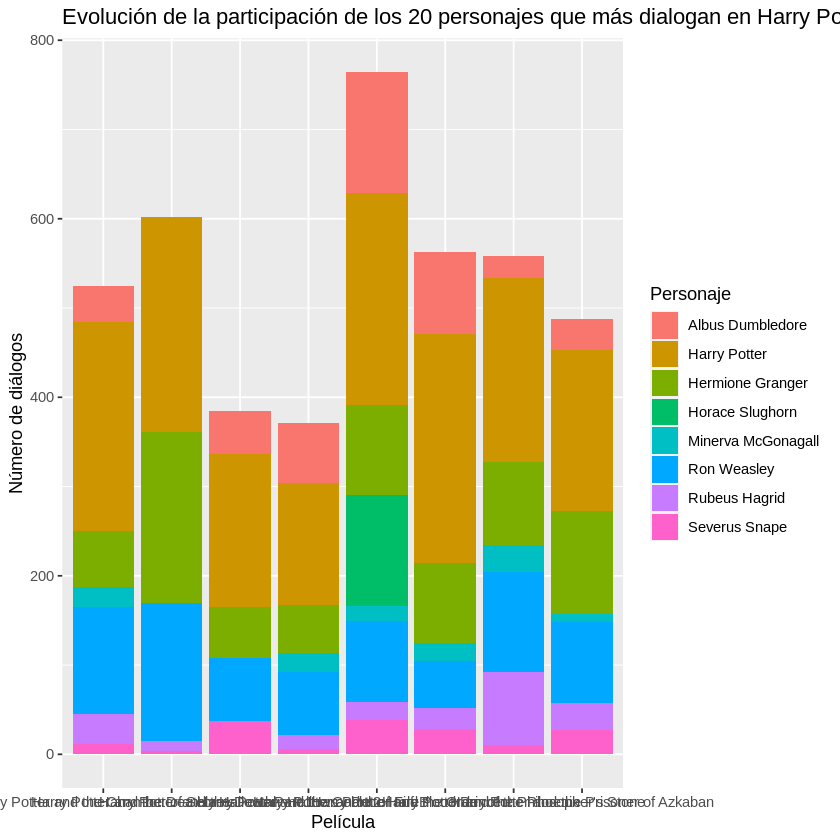

In [ ]:
ggplot(personajes_filtrados, aes(x = movie, y = num_dialog, fill = character)) +
  geom_bar(stat = "identity", position = "stack") +
  labs(x = "Película", y = "Número de diálogos", fill = "Personaje") +
  ggtitle("Evolución de la participación de los 20 personajes que más dialogan en Harry Potter")

Nos es complicado verlo en histograma, lo hacemos con líneas y ordenamos por película

Warning message:
“Removed 7 rows containing missing values (`geom_line()`).”


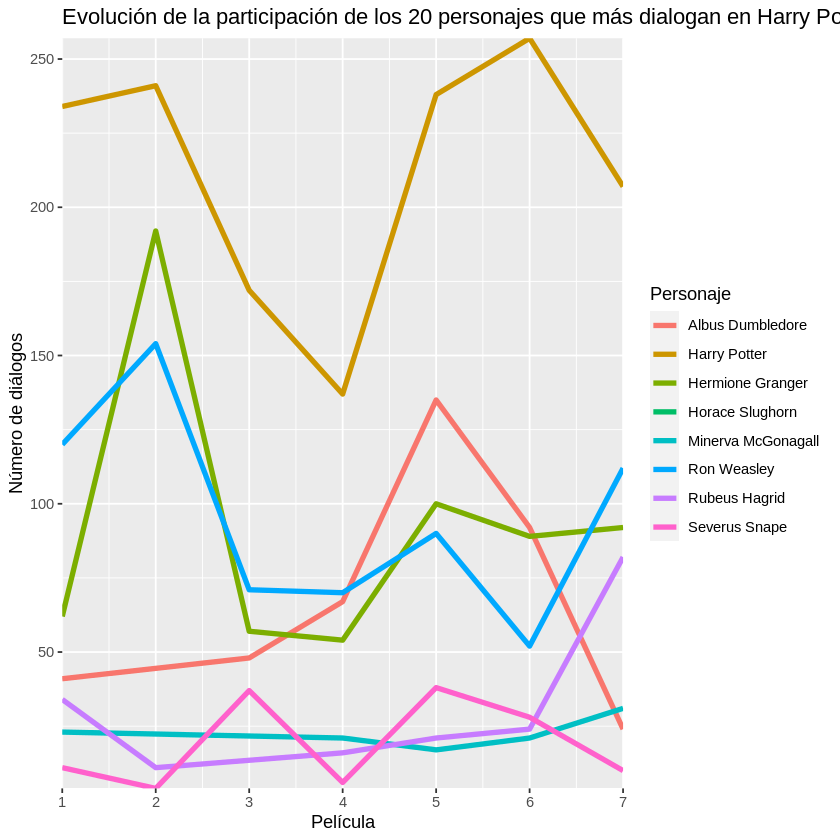

In [ ]:
ggplot(personajes_filtrados, aes(x = num_movie, y = num_dialog, color = character)) +
  geom_line(size = 1.5) +
  labs(x = "Número de Película", y = "Número de diálogos", color = "Personaje") +
  ggtitle("Evolución de la participación de los 20 personajes que más dialogan en Harry Potter") +
  scale_x_continuous(breaks = 1:7, labels = c("1", "2", "3", "4", "5", "6", "7"),
                     limits = c(1, 7),
                     expand = c(0, 0),
                     name = "Película") +
  scale_y_continuous(expand = c(0, 0), name = "Número de diálogos")

Graficamos los datos con líneas suaves y paleta de colores personalizada

`geom_smooth()` using formula = 'y ~ x'
Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = parametric, :
“span too small.   fewer data values than degrees of freedom.”
Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = parametric, :
“pseudoinverse used at 0.965”
Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = parametric, :
“neighborhood radius 3.035”
Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = parametric, :
“reciprocal condition number  0”
Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = parametric, :
“There are other near singularities as well. 4.1412”
Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = parametric, :
“span too small.   fewer data values than degrees of freedom.”
Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = parametric, :
“pseudoinverse used at 0.965”
Warning message in simpleLoess

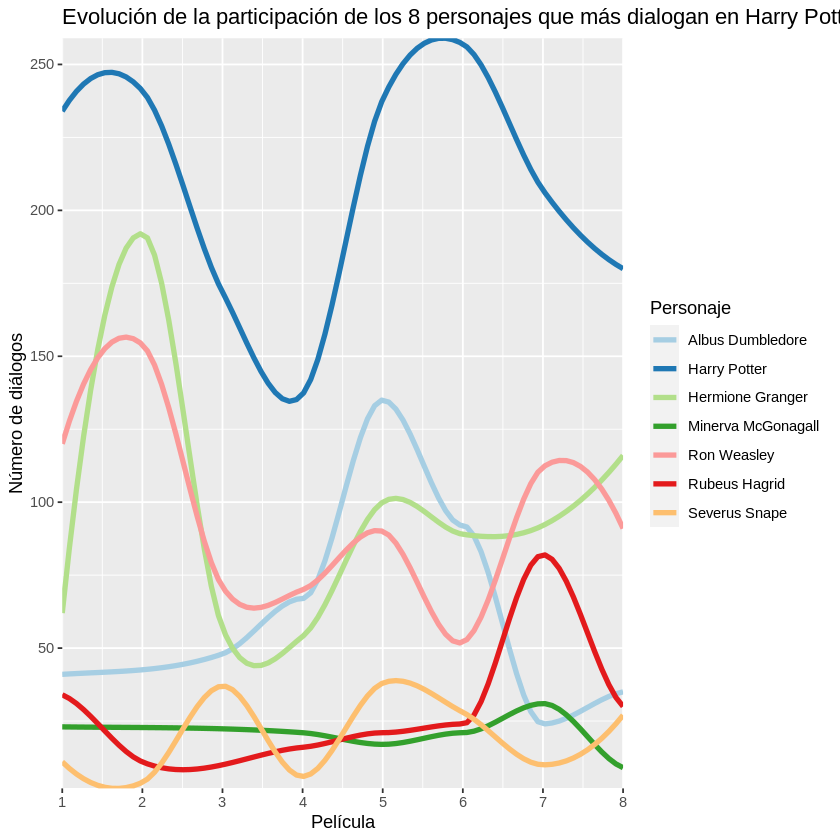

In [ ]:
ggplot(personajes_filtrados, aes(x = num_movie, y = num_dialog, color = character)) +
  geom_smooth(size = 1.5, se = FALSE, method = "loess", span = 0.5) +
  labs(x = "Número de Película", y = "Número de diálogos", color = "Personaje") +
  ggtitle("Evolución de la participación de los 8 personajes que más dialogan en Harry Potter") +
  scale_x_continuous(breaks = 1:8, labels = c("1", "2", "3", "4", "5", "6", "7", "8"),
                     limits = c(1, 8),
                     expand = c(0, 0),
                     name = "Película") +
  scale_y_continuous(expand = c(0, 0), name = "Número de diálogos") +
  scale_color_brewer(palette = "Paired")

# Unnesting y Stopwords

Realizamos un "unnest" para crear un nuevo df con una columna nueva palabra a palabra

movie,chapter,character,words,num_movie,Palabra,length
<chr>,<chr>,<chr>,<int>,<int>,<chr>,<int>
Harry Potter and the Philosopher's Stone,Doorstep Delivery,Albus Dumbledore,10,1,i,1
Harry Potter and the Philosopher's Stone,Doorstep Delivery,Albus Dumbledore,10,1,should,6
Harry Potter and the Philosopher's Stone,Doorstep Delivery,Albus Dumbledore,10,1,have,4
Harry Potter and the Philosopher's Stone,Doorstep Delivery,Albus Dumbledore,10,1,known,5
Harry Potter and the Philosopher's Stone,Doorstep Delivery,Albus Dumbledore,10,1,that,4
Harry Potter and the Philosopher's Stone,Doorstep Delivery,Albus Dumbledore,10,1,you,3
Harry Potter and the Philosopher's Stone,Doorstep Delivery,Albus Dumbledore,10,1,would,5
Harry Potter and the Philosopher's Stone,Doorstep Delivery,Albus Dumbledore,10,1,be,2
Harry Potter and the Philosopher's Stone,Doorstep Delivery,Albus Dumbledore,10,1,here,4


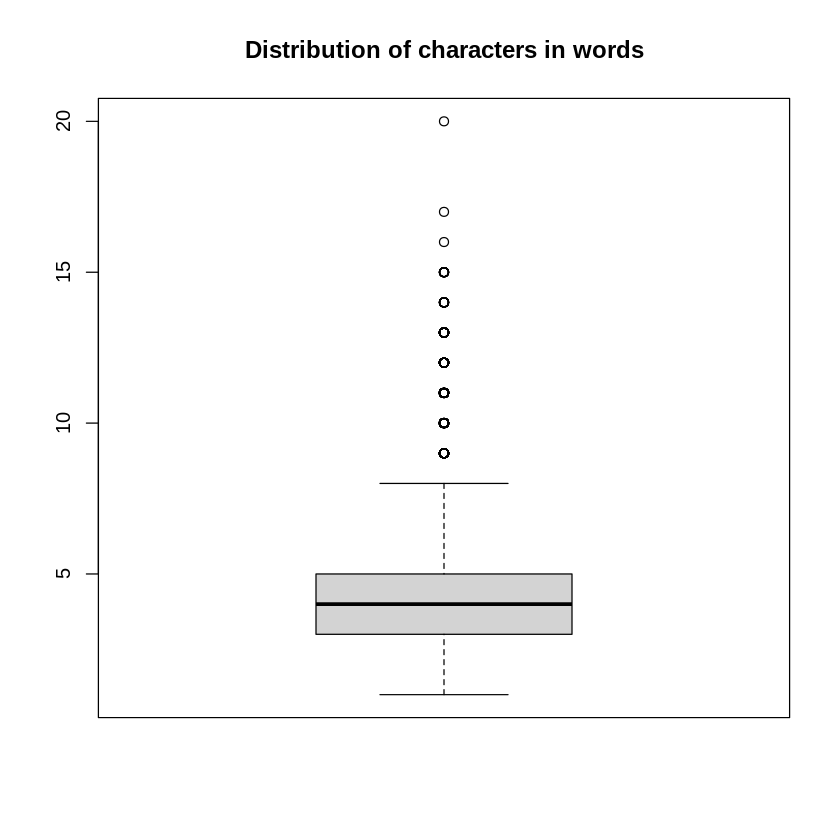

In [ ]:
df_unnest <- unnest(hp_total, dialog)


dialog_unnest <- unnest_tokens(hp_total, Palabra, dialog)

dialog_unnest$length <- nchar(dialog_unnest$Palabra)
boxplot(dialog_unnest$length, main = "Distribution of characters in words")

dialog_unnest

Hacemos un filtro para ver si está todo correcto

In [ ]:
dialog_unnest %>%
  filter(length>10) %>%
  arrange(desc(length)) %>%
  select(Palabra) %>%
  distinct(.) %>%
  head(10)

,Palabra
,<chr>
1,sillllleeennnnceeeee
2,counterproductive
3,misunderstanding
4,congratulations
5,transformations
6,resourcefulness
7,whippersnappers
8,extraordinarily
9,representitives


Limpiamos las palabras que son "stopwords"

In [ ]:
dialog_unnest %>%
  group_by(Palabra) %>%
  summarize(n = n()) %>%
  arrange(desc(n)) %>%
  head(10)

Palabra,n
<chr>,<int>
you,2836
the,2398
i,1969
to,1933
it,1311
a,1267
of,1098
and,941
that,825


Vemos que hay muchas palabras que sobran

In [ ]:
stop_words <- stopwords("en")
dialog_unnest <- dialog_unnest %>%
  filter(!Palabra %in% stop_words)

dialog_unnest %>%
  group_by(Palabra) %>%
  summarize(n = n()) %>%
  arrange(desc(n)) %>%
  head(10)

Palabra,n
<chr>,<int>
harry,656
know,429
well,372
now,343
one,326
think,292
just,290
potter,290
go,284


Vemos que las palabras ya han cambiado. Aún así, aún quedan muchas palabras que no necesitamos.

# Uso de Palabras y Comparativas entre Personajes

Ahora vamos a ver cuáles son las palabras más utilizadas en el mundo Harry Potter

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Warning message in RColorBrewer::brewer.pal(num_colors, "Dark2"):
“n too large, allowed maximum for palette Dark2 is 8
Returning the palette you asked for with that many colors
”


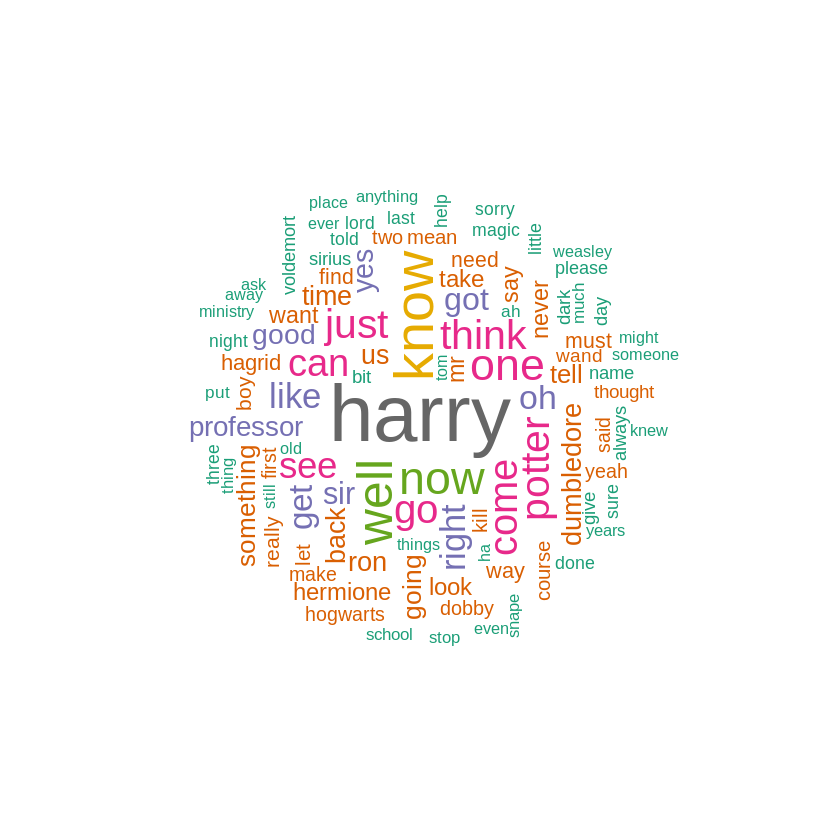

In [ ]:
num_colors <- 20
pal <- RColorBrewer::brewer.pal(num_colors, "Dark2")

dialog_unnest %>%
  group_by(Palabra) %>%
  summarize(n = n()) %>%
  arrange(desc(n)) %>%
  with(wordcloud(Palabra, n, min.freq=1, max.words = 100, random.order=FALSE, rot.per=0.35, 
                 colors = pal, fixed.asp = TRUE))

Tras esto, tenemos que realizar un stemming para quedarnos con la raíz de las palabras.

Dado que hay veces en que el stemming no nos devuleve resultadoss deseados, hacemos una copia del df sobre el que probar

In [ ]:
dialog_unnest -> prueba_stem

library(SnowballC)

prueba_stem$Palabra <- sapply(prueba_stem$Palabra, wordStem)

Tras hacer esto, vemos que hay palabras que no nos interesan eliminar, por lo que mantenemos el df dialog_unnest


Vamos a ver wl wordcloud de los distintos personajes

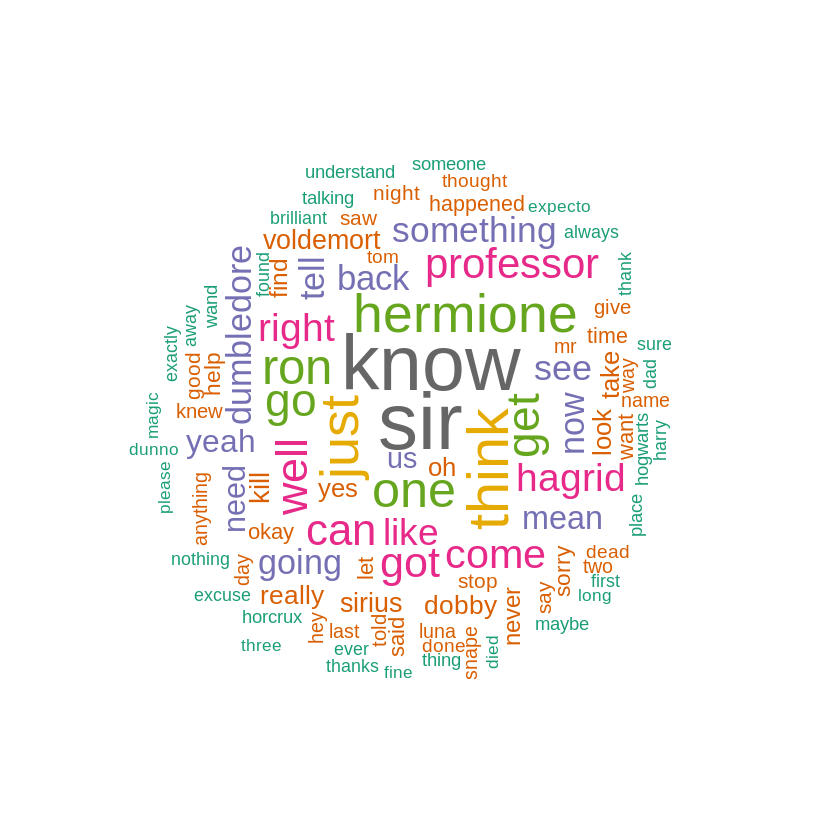

In [ ]:
#Harry Potter

personaje <- "Harry Potter"

# Generamos la nube de palabras para el personaje especificado
dialog_unnest %>%
  filter(character == personaje) %>%
  group_by(Palabra) %>%
  summarize(n = n()) %>%
  arrange(desc(n)) %>%
  with(wordcloud(Palabra, n, min.freq=1, max.words = 100, random.order=FALSE, rot.per=0.35, 
                 colors = pal, fixed.asp = TRUE))

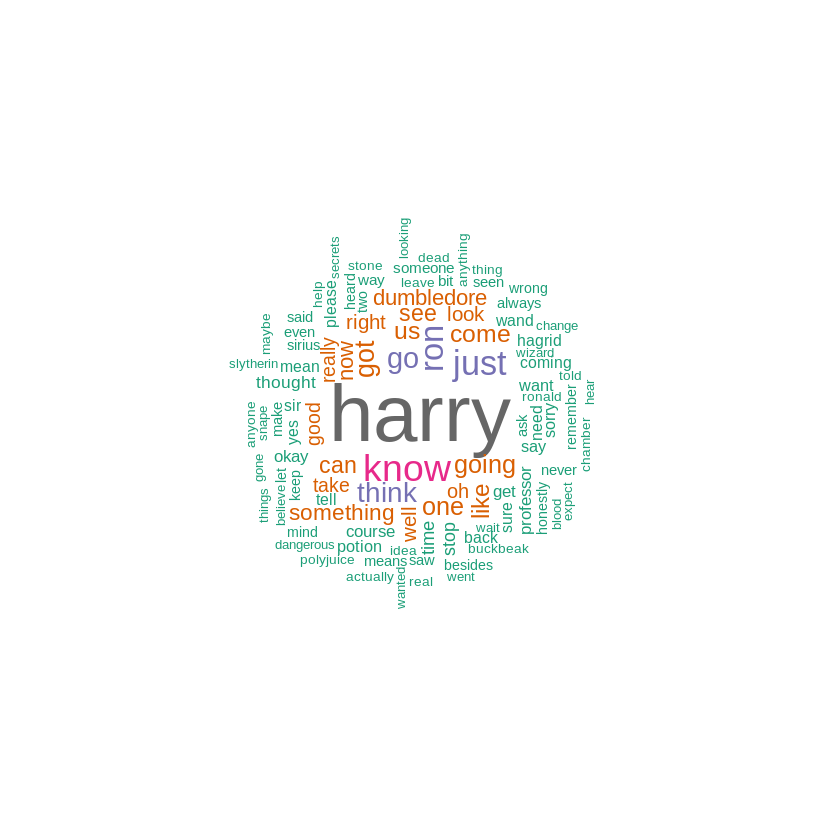

In [ ]:
#Hermione Granger

personaje <- "Hermione Granger"

# Generamos la nube de palabras para el personaje especificado
dialog_unnest %>%
  filter(character == personaje) %>%
  group_by(Palabra) %>%
  summarize(n = n()) %>%
  arrange(desc(n)) %>%
  with(wordcloud(Palabra, n, min.freq=1, max.words = 100, random.order=FALSE, rot.per=0.35, 
                 colors = pal, fixed.asp = TRUE))

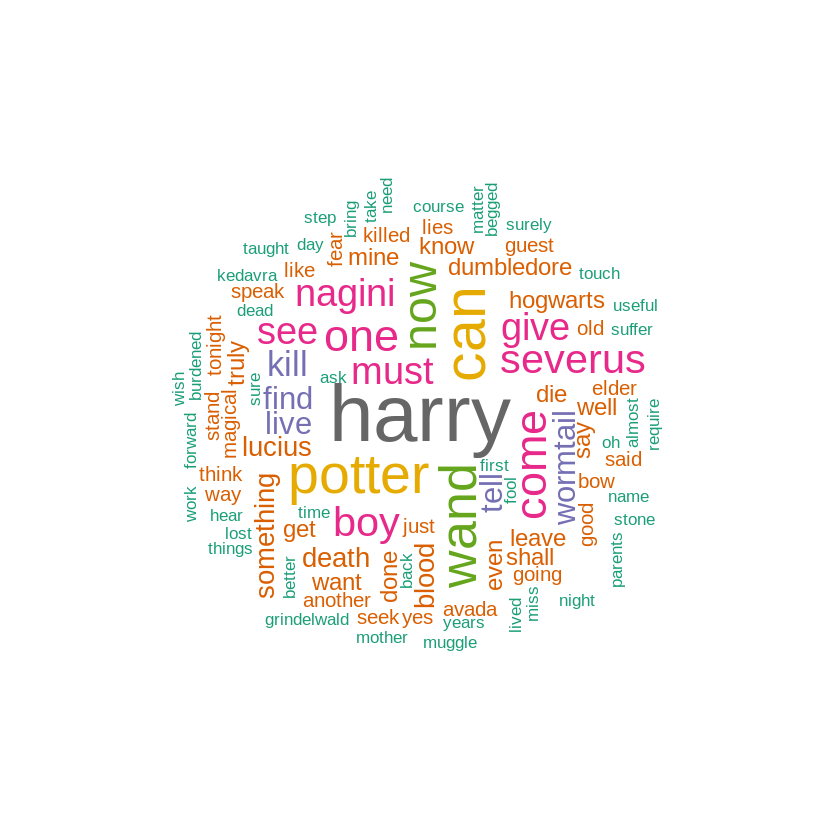

In [ ]:
#Voldemort

personaje <- "Voldemort"

# Generamos la nube de palabras para el personaje especificado
dialog_unnest %>%
  filter(character == personaje) %>%
  group_by(Palabra) %>%
  summarize(n = n()) %>%
  arrange(desc(n)) %>%
  with(wordcloud(Palabra, n, min.freq=1, max.words = 100, random.order=FALSE, rot.per=0.35, 
                 colors = pal, fixed.asp = TRUE))

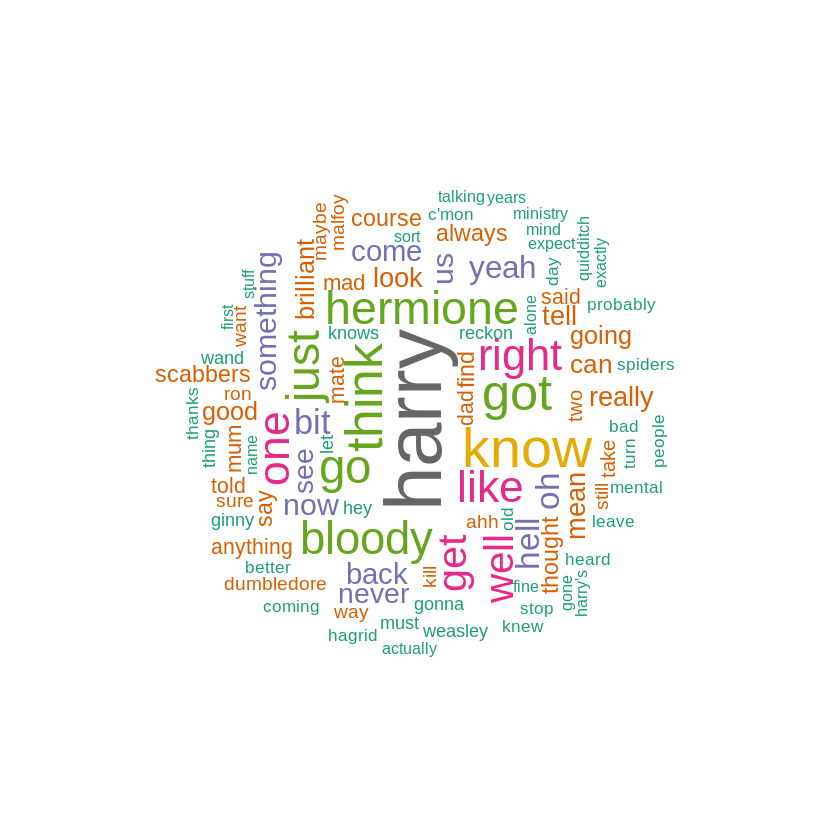

In [ ]:
#Ron Weasly

personaje <- "Ron Weasley"

# Generamos la nube de palabras para el personaje especificado
dialog_unnest %>%
  filter(character == personaje) %>%
  group_by(Palabra) %>%
  summarize(n = n()) %>%
  arrange(desc(n)) %>%
  with(wordcloud(Palabra, n, min.freq=1, max.words = 100, random.order=FALSE, rot.per=0.35, 
                 colors = pal, fixed.asp = TRUE))

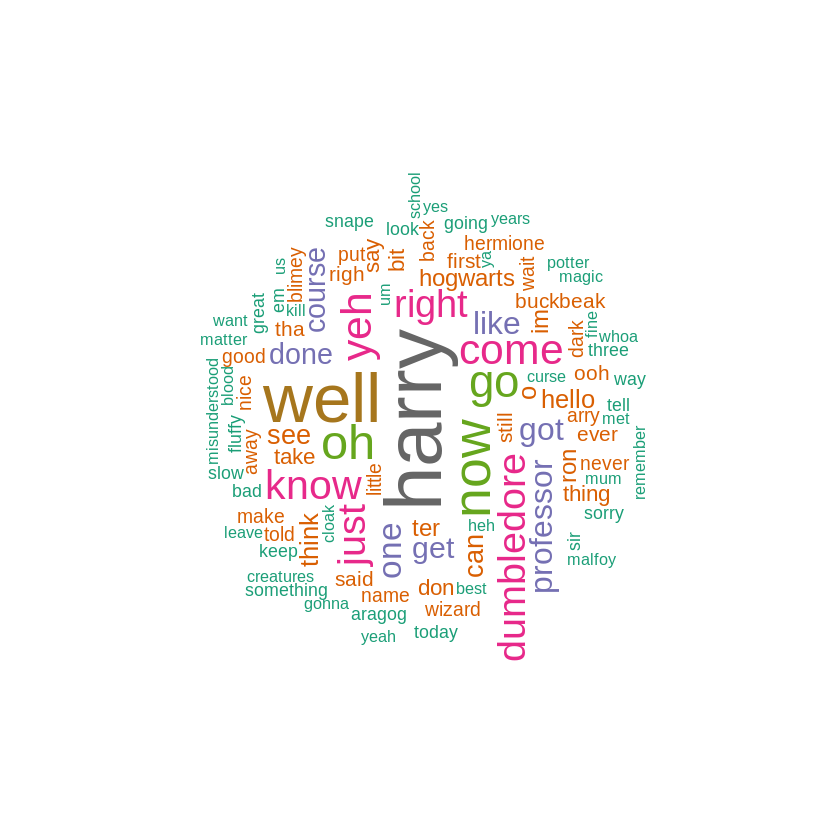

In [ ]:
#Hagrid

personaje <- "Rubeus Hagrid"

# Generamos la nube de palabras para el personaje especificado
dialog_unnest %>%
  filter(character == personaje) %>%
  group_by(Palabra) %>%
  summarize(n = n()) %>%
  arrange(desc(n)) %>%
  with(wordcloud(Palabra, n, min.freq=1, max.words = 100, random.order=FALSE, rot.per=0.35, 
                 colors = pal, fixed.asp = TRUE))

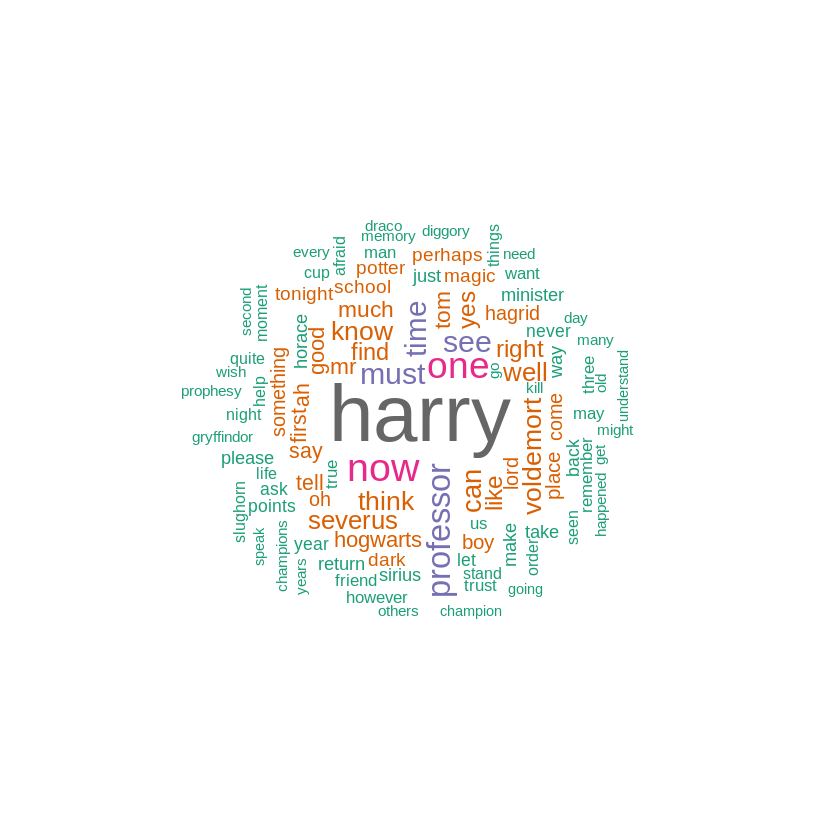

In [ ]:
#Albus Dumbledore

personaje <- "Albus Dumbledore"

# Generamos la nube de palabras para el personaje especificado
dialog_unnest %>%
  filter(character == personaje) %>%
  group_by(Palabra) %>%
  summarize(n = n()) %>%
  arrange(desc(n)) %>%
  with(wordcloud(Palabra, n, min.freq=1, max.words = 100, random.order=FALSE, rot.per=0.35, 
                 colors = pal, fixed.asp = TRUE))

Ahora analizaremos una comparación entre personajes

In [ ]:
total_words <- dialog_unnest %>%
  group_by(character) %>%
  summarize(total_words = n())

dialog_unnest <- left_join(dialog_unnest, total_words, by = "character")

Si modificamos las variables x e y, sacaremos el gráfico para comparar quien queramos

`summarise()` has grouped output by 'character', 'Palabra'. You can override
using the `.groups` argument.


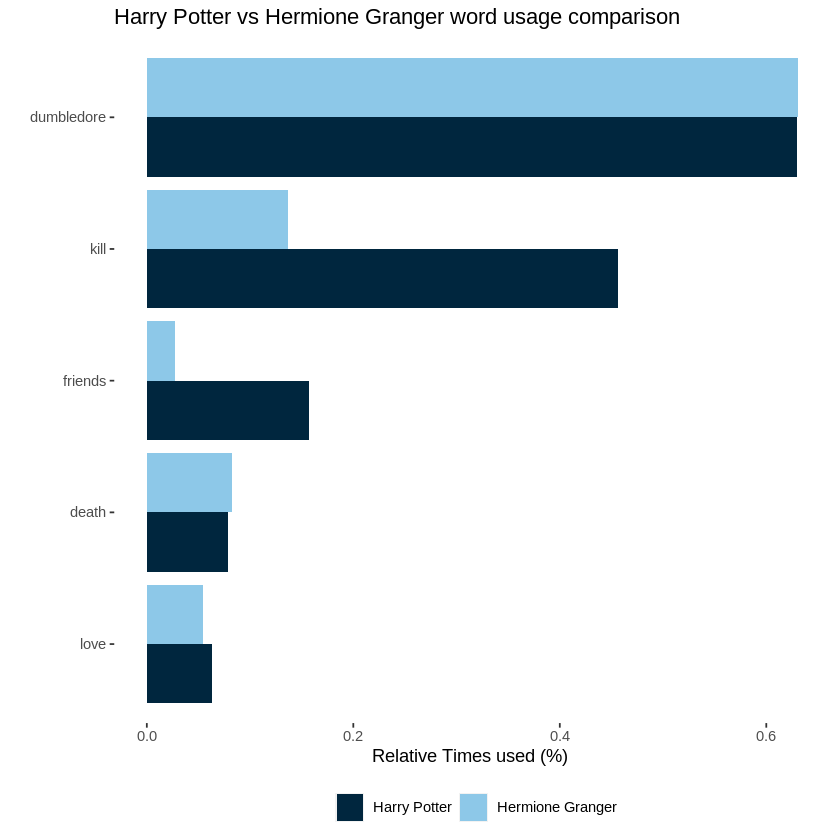

In [ ]:
x= "Harry Potter"
y= "Hermione Granger"

par(mfrow=c(1,1))
words_compare <- c("love", "kill", "dumbledore","death", "friends")
dialog_unnest%>%
  filter(character %in% c(x, y), Palabra %in% words_compare) %>%
  group_by(character, Palabra, total_words) %>%
  summarize(n_use = n()) %>%
  mutate(usage = n_use/total_words*100) %>%
  ggplot(aes(reorder(Palabra,usage),usage, fill=character)) +
  geom_bar(stat = "identity", position = "dodge")+
  coord_flip() +
  labs(title = paste(x, "vs", y, "word usage comparison"),
       x = "",
       y = "Relative Times used (%) ",
       fill = "") +
  theme(legend.position = "bottom", panel.background = element_blank()) +
  scale_fill_manual(values=c("#00263e", "#8dc8e8"))

In [ ]:
dialog_unnest -> dialog_unnest_shiny

Ahora vamos a ver cómo evoluciona cada personaje a lo largo de las películas en base a las palabras utilizadas

`summarise()` has grouped output by 'Palabra'. You can override using the
`.groups` argument.


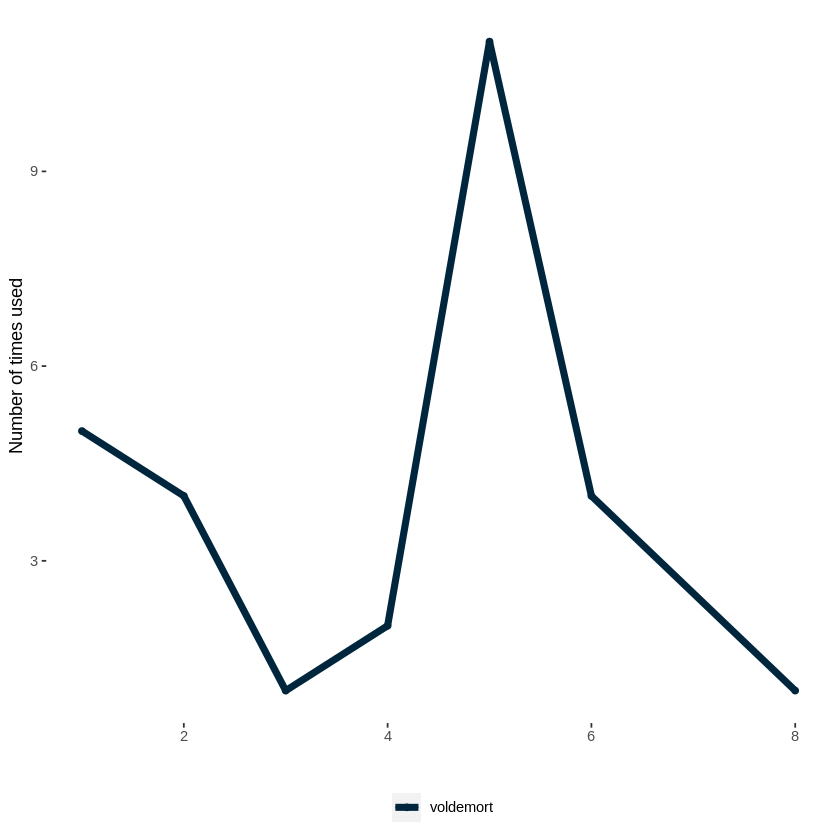

In [ ]:
x= "Harry Potter"
y= "voldemort"

dialog_unnest %>%
  filter(character == x, Palabra %in% c(y)) %>%
  group_by(Palabra, num_movie) %>%
  summarize(n = n()) %>%
  ggplot(aes(num_movie, n,group = 1, col = factor(Palabra))) + geom_line() + geom_point() + geom_line(size = 2)+  
  labs(x = "", y = "Number of times used", col ="") +
  theme(legend.position = "bottom", panel.background = element_blank()) +
  scale_color_manual(values=c("#00263e"))

# Análisis de sentimientos

`summarise()` has grouped output by 'sentiment'. You can override using the
`.groups` argument.


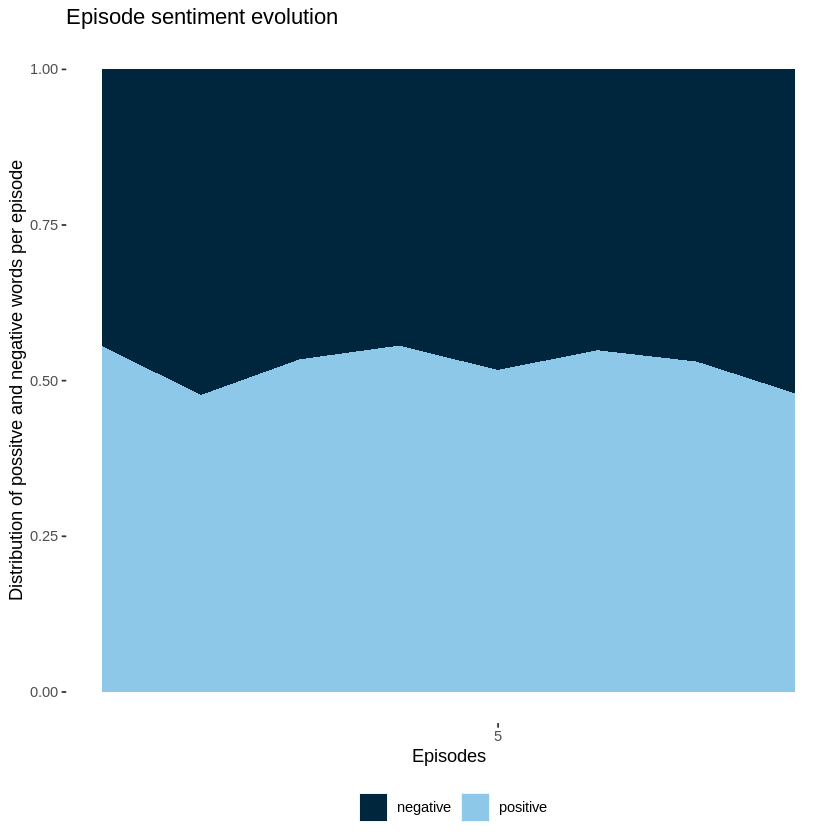

In [ ]:
sentiment <- get_sentiments("bing")
textos_por_persona_sentiment <- dialog_unnest %>%
  mutate(word = Palabra) %>%
  inner_join(sentiment, by = "word")

par(mfrow=c(1,2))
textos_por_persona_sentiment %>%
  group_by(sentiment, num_movie) %>%
  summarize(n = n()) %>%
  ggplot(aes(num_movie, n, fill=sentiment) ) + 
  geom_area(position = "fill") + 
  scale_x_continuous(breaks = seq(0,67,5))+
  theme(legend.position = "bottom", panel.background = element_blank()) +
  scale_fill_manual(values=c("#00263e", "#8dc8e8"))+
  labs(title = "Episode sentiment evolution", 
       x = "Episodes",
       y = "Distribution of possitve and negative words per episode",
       fill = "")

`summarise()` has grouped output by 'sentiment'. You can override using the
`.groups` argument.


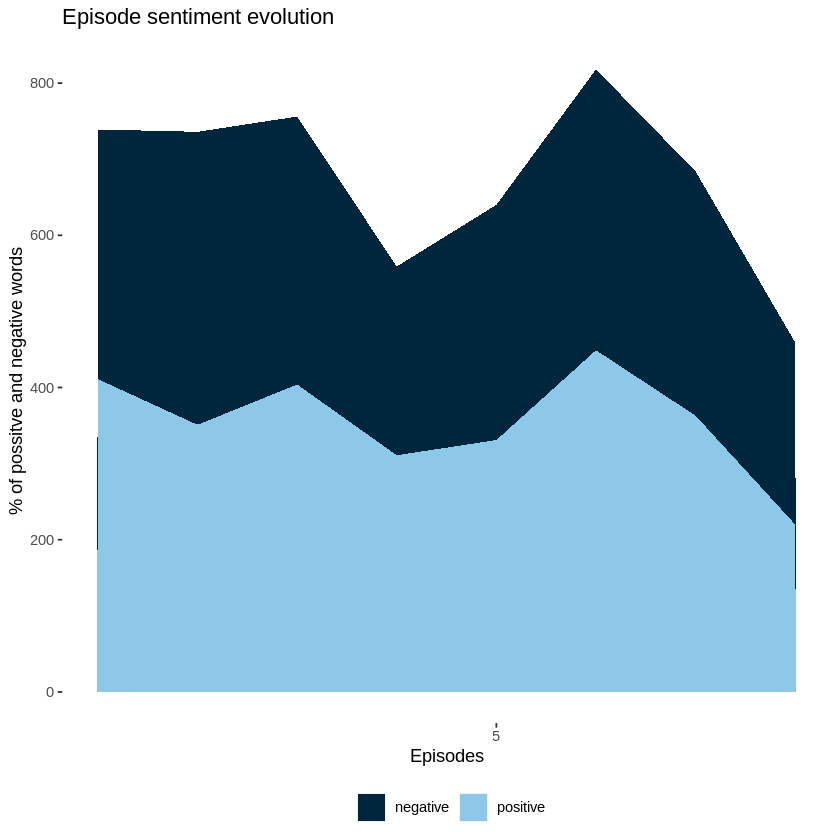

In [ ]:
textos_por_persona_sentiment %>%
  group_by(sentiment, num_movie) %>%
  summarize(n = n()) %>%
  ggplot(aes(num_movie, n, fill=sentiment) ) + 
  geom_area() + 
  scale_x_continuous(breaks = seq(0,67,5))+
  theme(legend.position = "bottom", panel.background = element_blank()) +
  scale_fill_manual(values=c("#00263e", "#8dc8e8"))+
  labs(title = "Episode sentiment evolution", 
       x = "Episodes",
       y = "% of possitve and negative words",
       fill="")

Ahora lo haremos por personaje

Antes de nada, definiremos los personajes principales

In [ ]:
main_characters <- dialog_unnest %>%
  group_by(character) %>%
  filter(character != "man")%>%
  summarize(n=n()) %>%
  top_n(15)%>%
  select(character) %>%
  t(.) %>%
  as.vector(.)

main_characters

Selecting by n


[1] "Alastor Moody"      "Albus Dumbledore"   "Arthur Weasley"    
 [4] "Draco Malfoy"       "Harry Potter"       "Hermione Granger"  
 [7] "Horace Slughorn"    "Minerva McGonagall" "Remus Lupin"       
[10] "Ron Weasley"        "Rubeus Hagrid"      "Severus Snape"     
[13] "Sirius Black"       "Tom Riddle"         "Voldemort"

`summarise()` has grouped output by 'character', 'sentiment', 'num_movie'. You
can override using the `.groups` argument.


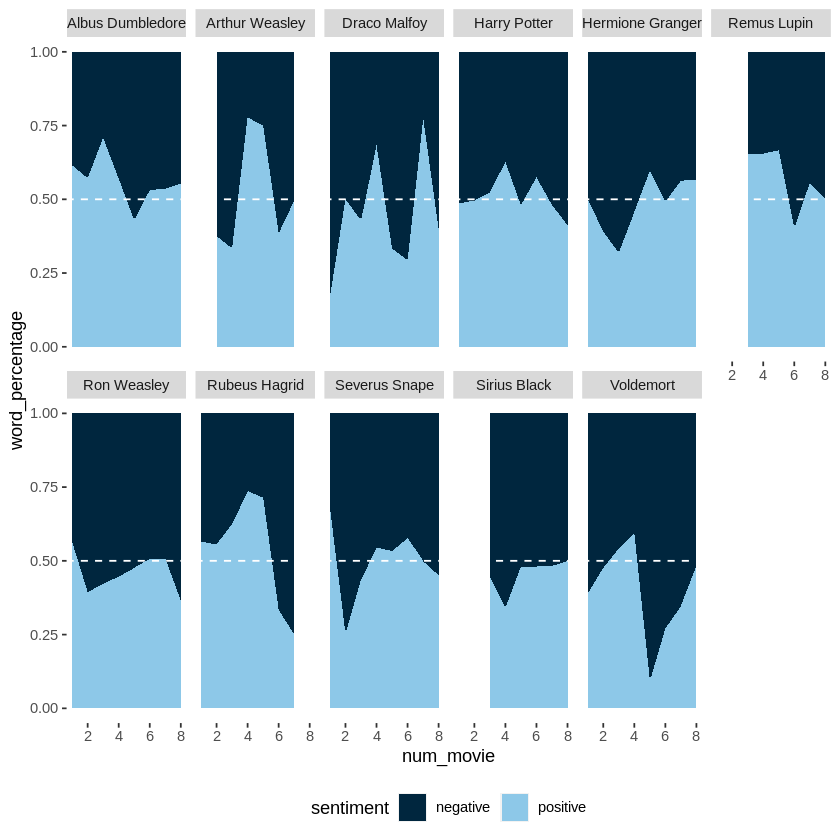

In [ ]:
textos_por_persona_sentiment %>%
  group_by(character, sentiment, num_movie, total_words) %>%
  filter(character %in% main_characters) %>%
  filter(!character %in% c("Horace Slughorn","Alastor Moody","Tom Riddle","Dolores Umbridge", "Minerva McGonagall")) %>%
  summarize(n = n()) %>%
  mutate(word_percentage = n/total_words*100) %>%
  ggplot(aes(num_movie, word_percentage, fill=sentiment)) + geom_area(position = "fill") + facet_wrap(.~character, nrow = 2) + geom_hline(yintercept=0.5, linetype = "dashed", col = "white") +
  theme(legend.position = "bottom", panel.background = element_blank()) +
  scale_fill_manual(values=c("#00263e", "#8dc8e8"))

Hagamos un análisis similar pero con un gráfico de líneas

In [ ]:
textos_por_persona_sentiment %>%
  filter(character %in% main_characters) %>%
  filter(!character %in% c("Dobby", "Remus Lupin", "Horace Slughorn","Alastor Moody","Tom Riddle","Dolores Umbridge", "Minerva McGonagall")) %>%
  group_by(character, sentiment, num_movie) %>%
  summarize(n = n()) %>%
  spread(sentiment, n) %>%
  mutate(Sentiment = positive/(positive+negative)) %>%
  ggplot(aes(num_movie, Sentiment, col=character)) + geom_line() + geom_point() + geom_hline(yintercept=0.5, linetype = "dashed") +
  scale_x_continuous(breaks=seq(1,7,1)) +
  theme(legend.position = "bottom", panel.background = element_blank()) +
  scale_color_manual(values= pal) +
  labs(title = "Sentiment Evolution of Harry Potter", x="Temporada", y="Positive sentiment (%)", col ="") 

textos_por_persona_sentiment

`summarise()` has grouped output by 'character', 'sentiment'. You can override
using the `.groups` argument.
ERROR while rich displaying an object: Error in `palette()`:
! Insufficient values in manual scale. 10 needed but only 8 provided.

Traceback:
1. tryCatch(withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler), error = outer_handler)
2. tryCatchList(expr, classes, parentenv, handlers)
3. tryCatchOne(expr, names, parentenv, handlers[[1L]])
4. doTryCatch(return(expr), name, parentenv, handler)
5. withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     pre

movie,chapter,character,words,num_movie,Palabra,length,total_words,word,sentiment
<chr>,<chr>,<chr>,<int>,<int>,<chr>,<int>,<int>,<chr>,<chr>
Harry Potter and the Philosopher's Stone,Doorstep Delivery,Minerva McGonagall,9,1,good,4,991,good,positive
Harry Potter and the Philosopher's Stone,Doorstep Delivery,Minerva McGonagall,9,1,rumours,7,991,rumours,negative
Harry Potter and the Philosopher's Stone,Doorstep Delivery,Albus Dumbledore,9,1,afraid,6,3652,afraid,negative
Harry Potter and the Philosopher's Stone,Doorstep Delivery,Albus Dumbledore,9,1,good,4,3652,good,positive
Harry Potter and the Philosopher's Stone,Doorstep Delivery,Albus Dumbledore,9,1,bad,3,3652,bad,negative
Harry Potter and the Philosopher's Stone,Doorstep Delivery,Minerva McGonagall,14,1,wise,4,991,wise,positive
Harry Potter and the Philosopher's Stone,Doorstep Delivery,Minerva McGonagall,14,1,trust,5,991,trust,positive
Harry Potter and the Philosopher's Stone,Doorstep Delivery,Minerva McGonagall,14,1,important,9,991,important,positive
Harry Potter and the Philosopher's Stone,Doorstep Delivery,Albus Dumbledore,9,1,trust,5,3652,trust,positive


# Bigramas

In [ ]:
dialog_unnest_2 <- unnest_tokens(hp_total, output="Words", input = dialog, token = "ngrams", n=2) %>%
  separate(Words,c("Palabra1","Palabra2"), sep = " ")


stop_words <- stopwords("en")

In [ ]:
dialog_unnest_2$Palabra1 <- gsub("'","", dialog_unnest_2$Palabra1)
dialog_unnest_2$Palabra2 <- gsub("'","", dialog_unnest_2$Palabra2)

dialog_unnest_2$Palabra1 <- gsub("'","", dialog_unnest_2$Palabra1)
dialog_unnest_2$Palabra2 <- gsub("'","", dialog_unnest_2$Palabra2)

stop_words <- stopwords("en")
stop_words <- gsub("'","",stop_words)


network <- dialog_unnest_2 %>%
  filter(!is.na(Palabra1),!is.na(Palabra2))%>%
  filter(!Palabra1 %in% stop_words) %>%
  filter(!Palabra2 %in% stop_words) %>%
  count(Palabra1,Palabra2,sort=TRUE)

head(network,100)

,Palabra1,Palabra2,n
,<chr>,<chr>,<int>
1,harry,potter,95
2,mr,potter,48
3,ha,ha,34
4,dark,lord,27
5,professor,dumbledore,23
6,sirius,black,22
7,professor,snape,20
8,yes,sir,20
9,years,ago,19


In [ ]:
library(igraph)

network <- network %>%
  filter(n > 9) %>%
  graph_from_data_frame()

network

IGRAPH 37210ed DN-- 64 44 -- 
+ attr: name (v/c), n (e/n)
+ edges from 37210ed (vertex names):
 [1] harry    ->potter     mr       ->potter     ha       ->ha        
 [4] dark     ->lord       professor->dumbledore sirius   ->black     
 [7] professor->snape      yes      ->sir        years    ->ago       
[10] good     ->luck       miss     ->granger    come     ->back      
[13] harry    ->harry      dark     ->arts       one      ->two       
[16] mr       ->weasley    oh       ->yes        death    ->eaters    
[19] expecto  ->patronum   lord     ->voldemort  polyjuice->potion    
[22] professor->mcgonagall right    ->now        ron      ->ron       
+ ... omitted several edges

Using "stress" as default layout
Warning message:
“ggrepel: 26 unlabeled data points (too many overlaps). Consider increasing max.overlaps”


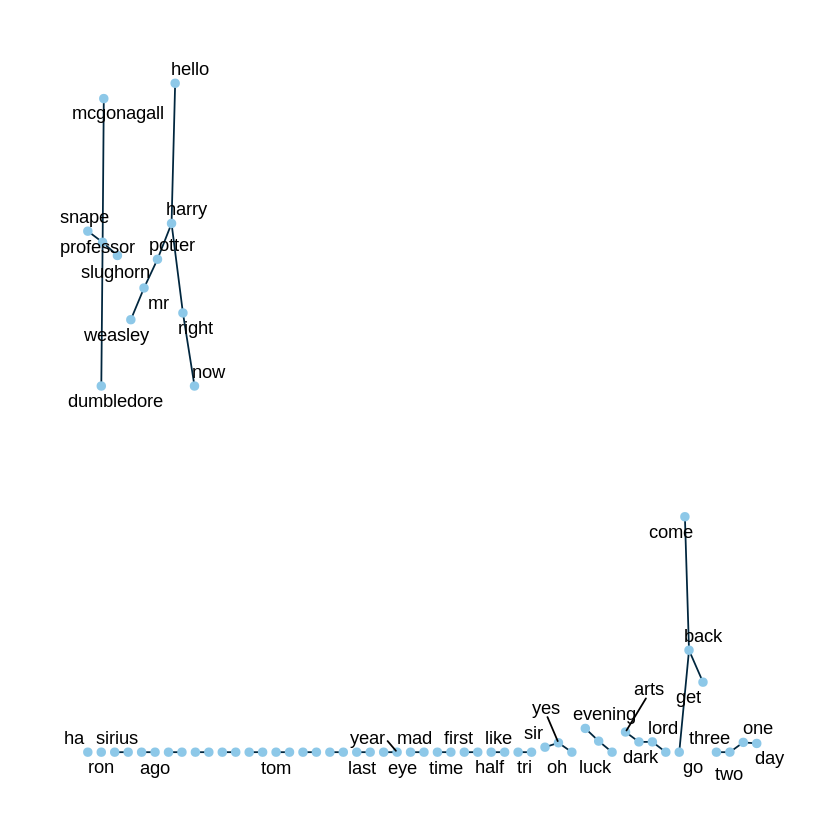

In [ ]:
set.seed(2017)

ggraph(network) +
  geom_edge_link(color = "#00263e") +
  geom_node_point( color = "#8dc8e8", size = 2) +
  geom_node_text(aes(label = name), repel = TRUE) +
  theme_graph(background = "white")